### GitHub repository
Link to repository used to colaborate on the assignment:
https://github.com/KarolineKlan/Assignments_ComSocSci2024.git

### Contribution statement

Team members:

- Jacob (s214596)
- Kristoffer (s214609)
- Karoline (s214638)

All members collaborated and contributed to every part of the assignment.

# Assignment 2

In [7]:
#Import relevant libraries
import json
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt
import numpy as np

## Part 1: Properties of the real-world network of Computational Social Scientists
Exercise: Analyzing Networks through a Random Model

### 1.1 The random model
Building a random model from CSS-network 

In [13]:
#load the CSS-network that was created in assignment 1
def load_network_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
        G = nx.node_link_graph(data)
    return G

# Replace 'network_data.json' with the path to your JSON file
file_path = 'data/network_with_attributes.json'
G = load_network_from_json(file_path)


print(f'The number of nodes in G is {G.number_of_nodes()} and the amount of edges are {G.number_of_edges()}')
print(f'The denisty of G is {nx.density(G)}')
print(f'Is the graph fully connected (not disconnected): {nx.is_connected(G)}')

The number of nodes in G is 8478 and the amount of edges are 23778
The denisty of G is 0.0006617130855140186
Is the graph fully connected (not disconnected): False


In [14]:
#calculate p and k for the CSS-network
N = G.number_of_nodes() #8478
L = G.number_of_edges() #23778

p = 2*L/(N*(N-1)) #næsten det samme som density

#calculate the average degree
k = p*(N-1)
print(f'\nAverage degree of the CSS-network: {k}')


Average degree of the CSS-network: 5.6093418259023355


In [9]:
#function to calculate generate random network:
def generate_random_network(node_count, probability):
    random_network = nx.Graph()
    nodes = range(node_count)
    random_network.add_nodes_from(nodes)

    for i in nodes:
        for j in nodes:
            if i < j:
                if np.random.uniform(0, 1) < probability:
                    random_network.add_edge(i, j)

    return random_network

# Generate random network
random_network = generate_random_network(N, p)

# Print some information about the generated random network
print(f'The number of nodes in the random network is {random_network.number_of_nodes()}')
print(f'The number of edges in the random network is {random_network.number_of_edges()}')
print(f'The density of the random network is {nx.density(random_network)}')
print(f'Is the random network fully connected: {nx.is_connected(random_network)}')

The number of nodes in the random network is 8478
The number of edges in the random network is 23610
The density of the random network is 0.0006570378479681209
Is the random network fully connected: False


In [ ]:
"""
INSERT CODE TO VISUALIZE THE NETWORKS
"""

> * Answer the following questions __(max 200 words in total)__: 
>    - What regime does your random network fall into? Is it above or below the critical threshold?  
>    - According to the textbook, what does the network's structure resemble in this regime?  
>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.

#### Regime:
** ANSWER QUESTION HERE **

### 1.2 Degree distribution

In [15]:
# Obtain the degrees of all nodes in the random network and CSS-network
Normal_degrees = [degree for node, degree in random_network.degree()]
CSS_degrees = [degree for node, degree in G.degree()]   


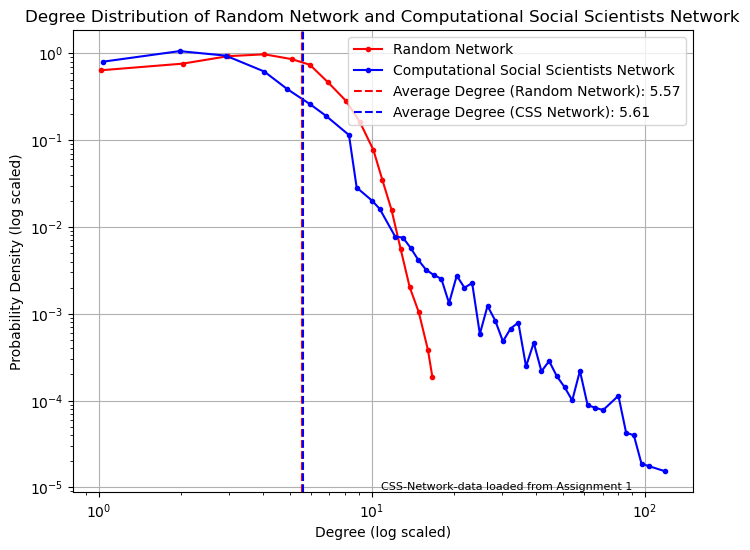

In [16]:
#Visualize the degree distribution of the random network and the CSS-network
# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Define bins using logspace for logarithmic scaling
bins_norm = np.logspace(0, np.log10(max(Normal_degrees)), 75)
bins_css = np.logspace(np.log10(min(CSS_degrees)), np.log10(max(CSS_degrees)), 75)

# Plot the degree distribution of the random network
hist_normal, edges_normal = np.histogram(Normal_degrees, bins=bins_norm, density=True)
x_norm = (edges_normal[1:] + edges_normal[:-1]) / 2

# Filter empty bins
xx_norm, yy_norm = zip(*[(i, j) for (i, j) in zip(x_norm, hist_normal) if j > 0])

# Plot the degree distribution of the Computational Social Scientists network
hist_css, edges_css = np.histogram(CSS_degrees, bins=bins_css, density=True)
x_css = (edges_css[1:] + edges_css[:-1]) / 2

# Filter empty bins
xx_css, yy_css = zip(*[(i, j) for (i, j) in zip(x_css, hist_css) if j > 0])

# Plot them
ax.plot(xx_norm, yy_norm, marker='.', label='Random Network', color='r')
ax.plot(xx_css, yy_css, marker='.', label='Computational Social Scientists Network', color='b')


# Calculate average degree for both networks
avg_degree_random = np.mean(Normal_degrees)
avg_degree_css = np.mean(CSS_degrees)

# Add vertical lines for average degrees
ax.axvline(avg_degree_random, color='r', linestyle='--', label=f'Average Degree (Random Network): {avg_degree_random:.2f}')
ax.axvline(avg_degree_css, color='b', linestyle='--', label=f'Average Degree (CSS Network): {avg_degree_css:.2f}')


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Degree (log scaled)')
ax.set_ylabel('Probability Density (log scaled)')
ax.set_title('Degree Distribution of Random Network and Computational Social Scientists Network')
ax.legend()

# Show grid
ax.grid(True) 

 
data_source = "CSS-Network-data loaded from Assignment 1" 
plt.text(0.7, 0.0, data_source, ha='center', va='bottom', transform=ax.transAxes, fontsize=8)

# Show the plot
plt.show()


#### Questions:
> * Answer the following questions: 
>    - Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.
>    - What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties?

** ANSWER QUESTIONS BETTER HERE **

We can see that the CSS network is approximately a straight line in log-log-scale meaning it ia obviously a heavy tailed distribution. The mean of the two networks are approximately almost idential, meaning that average is not a meaningful measure when handeling heavy tailed distributions, as they can be misleading

## Part 2 Network Analysis in Computational Social Science

## Part 3 - Words that characterize Computational Social Science communities